The aim is to predict the burned area of forest area of forest fires, in the northeast region of Portugal, using meteorologi data.

<span style='font-weight:bold; font-size:30px'> Content </span>

1. **Data Loading**
2. **EDA**
3. **Data Preprocessing**
4. **Feature Selection**

<h1 style='font-weight:bold; color:orange;'> Data Loading </h1>

In [4]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
forest_fires = fetch_ucirepo(id=162) 
  
# data (as pandas dataframes) 
X = forest_fires.data.features 
y = forest_fires.data.targets 
    
df = pd.concat([X, y], axis=1)
df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


<h1 style='font-weight: bold; color: orange;'> Exploratory Data Analysis (EDA) </h1>

In [ ]:
# check the number of rows and columns in the dataset
print(df.shape)

print('----------------------------')

# check the number of missing values in the dataset
print(df.isna().sum())

print('----------------------------')

print(df.columns)

print('----------------------------')

print(df.dtypes.value_counts())

print('----------------------------')

# response variable (y) is 'area'
print(df['area'].describe())

(517, 13)
----------------------------
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64
----------------------------
Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')
----------------------------
float64    8
int64      3
object     2
Name: count, dtype: int64
----------------------------
count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64


In [83]:
df.select_dtypes(include=['object'])
df.select_dtypes(include=['float64', 'int64'])
df['day'].value_counts()

day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: count, dtype: int64

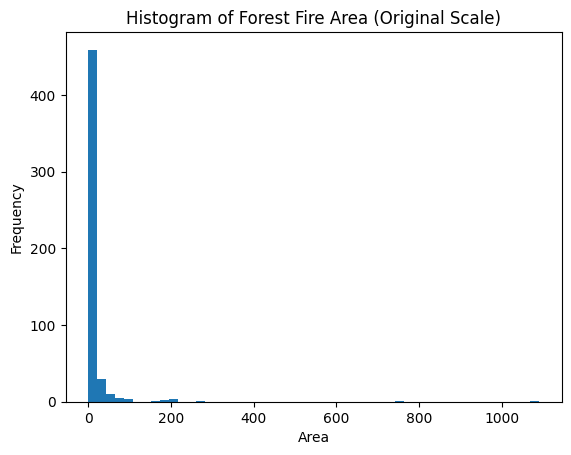

In [9]:

df['area'].plot(kind='hist', bins = 50)
plt.title("Histogram of Forest Fire Area (Original Scale)")
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.show();

<h1 style='font-size:40px; font-weight:bold; color:orange;'> Data Preprocessing </h1>

In [76]:
df1 = pd.get_dummies(df, columns=['month', 'day'])
df1

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,False,False,False,True,False,False,False,False,False,False
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,False,True,False,False,False,False,False,False,True,False
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,False,True,False,False,False,True,False,False,False,False
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,False,False,False,True,False,False,False,False,False,False
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,False,False,False,False,False,False,True,False,False,False
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,False,False,False,False,False,False,True,False,False,False
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,False,False,False,False,False,False,True,False,False,False
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,False,False,False,False,False,True,False,False,False,False


In [62]:
# Defining features and target variable
X = df1.drop(columns=['area'])
y = pd.DataFrame({'Intercept':1, 'Area':df1['area']})
y

,Intercept,Area
0,1,0.00
1,1,0.00
2,1,0.00
3,1,0.00
4,1,0.00
...,...,...
512,1,6.44
513,1,54.29
514,1,11.16
515,1,0.00


<h1 style="color:orange; font-weight:bold">Feature Engineering</h1>

In [134]:
# k fold cross-validation

lr = LinearRegression()

x = forest.drop(['area', 'month', 'day'], axis=1)
y = forest['area']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

neg_mse = cross_val_score(lr, x, y, cv=kf, scoring='neg_mean_squared_error')

rmse = np.sqrt(-neg_mse)

print("RMSE: ", rmse.mean())


RMSE:  54.64396857012845


In [135]:
# k fold cross-validation

x = forest.drop(['area', 'month', 'day'], axis=1)

for x in x.columns
    lr = LinearRegression()

    x = forest.drop(['area', 'month', 'day'], axis=1)
    y = forest['area']

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    neg_mse = cross_val_score(lr, x, y, cv=kf, scoring='neg_mean_squared_error')

    rmse = np.sqrt(-neg_mse)

    print("RMSE: ", rmse.mean())


SyntaxError: expected ':' (3720276730.py, line 5)

<h2 style='color:#00bfff; font-weight:bold'>Forward Selection</h2>

In [103]:
y = df['area']
x = df.drop(columns=['area', 'month', 'day'])

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.119
Date:                Thu, 08 May 2025   Prob (F-statistic):              0.345
Time:                        09:12:03   Log-Likelihood:                -2874.8
No. Observations:                 517   AIC:                             5772.
Df Residuals:                     506   BIC:                             5818.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3693     63.019     -0.101      0.920    -130.181     117.443
X              1.9079      1.448      1.317      0.188      -0.938       4.753
Y              0.5692      2.736      0.208      0.835      -4.807       5.945
FFMC          -0.0392      0.661     -0.059      0.953      -1.337       1.259
DMC            0.0773      0.067      1.151      0.250      -0.055       0.209
DC            -0.0033      0.016     -0.200      0.841      -0.036       0.029
ISI           -0.7137      0.772     -0.925      0.355      -2.229       0.802
temp           0.8002      0.787      1.017      0.310      -0.746       2.347
RH            -0.2306      0.237     -0.972      0.332      -0.697       0.236
wind           1.5574      1.670      0.933      0.352      -1.724       4.839
rain          -3.4040      9.681     -0.352      0.725     -22.424      15.616
==============================================================================
Omnibus:                      975.065   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           781330.782
Skew:                          12.570   Prob(JB):                         0.00
Kurtosis:                     191.782   Cond. No.                     1.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
df = pd.read_csv(url)

# Preprocess df
df = pd.get_dummies(df, columns=['month', 'day'], drop_first=True)
X = df.drop('area', axis=1)
y = np.log(df['area'] + 1)  # Log transformation

# Forward selection with k-fold cross-validation
def forward_selection(X, y, k=10):
    selected_features = []
    remaining_features = list(X.columns)
    best_score = float('inf')

    while remaining_features:
        scores = []
        for feature in remaining_features:
            temp_features = selected_features + [feature]
            kf = KFold(n_splits=k)
            fold_scores = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index][temp_features], X.iloc[test_index][temp_features]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                model = LinearRegression()
                model.fit(X_train, y_train)
                predictions = model.predict(X_test)
                fold_scores.append(mean_squared_error(y_test, predictions))

            scores.append(np.mean(fold_scores))

        best_feature_index = np.argmin(scores)
        if scores[best_feature_index] < best_score:
            best_score = scores[best_feature_index]
            selected_features.append(remaining_features[best_feature_index])
            remaining_features.pop(best_feature_index)
        else:
            break

    return selected_features

# Execute forward selection
selected_features = forward_selection(X, y)
print("Selected features:", selected_features)


Selected features: ['month_jan', 'month_mar']


In [129]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
df = pd.read_csv(url)

# Drop non-numeric features or encode them
df = pd.get_dummies(df, drop_first=True)

# Features and target
X = df.drop("area", axis=1)
y = df["area"]

# Optionally log-transform target to reduce skew
import numpy as np
y = np.log1p(y)

# Define model
model = LinearRegression()

# Create pipeline with scaling and selection
cv = KFold(n_splits=5, shuffle=True, random_state=42)
sfs = SequentialFeatureSelector(model, direction='forward', cv=cv, n_features_to_select='auto')

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', sfs),
    ('regressor', model)
])

# Fit pipeline
pipeline.fit(X, y)

# Get selected features
selected_mask = pipeline.named_steps['feature_selection'].get_support()
selected_features = X.columns[selected_mask]
print("Selected features:", list(selected_features))


Selected features: ['X', 'DMC', 'DC', 'ISI', 'temp', 'wind', 'month_dec', 'month_jan', 'month_mar', 'month_nov', 'month_sep', 'day_sat', 'day_tue']


In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
df = pd.read_csv(url)

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['month', 'day'])

# Transform target variable (log(area + 1))
y = np.log(df['area'] + 1)
X = df.drop('area', axis=1)

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Initialize variables
selected_features = []
remaining_features = X_scaled.columns.tolist()
scores_history = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Reproducible folds

# Forward selection loop
for i in range(len(remaining_features)):
    scores = []
    candidates = []
    for feature in remaining_features:
        current_features = selected_features + [feature]
        X_subset = X_scaled[current_features]
        
        # 5-fold CV using Linear Regression
        model = LinearRegression()
        mse_scores = cross_val_score(
            model, X_subset, y, cv=kf, scoring='neg_mean_squared_error'
        )
        avg_score = np.mean(mse_scores)
        scores.append(avg_score)
        candidates.append(feature)
    
    # Select the best feature for this iteration
    best_idx = np.argmax(scores)
    best_feature = candidates[best_idx]
    best_score = scores[best_idx]
    
    # Update feature lists and record MSE
    selected_features.append(best_feature)
    remaining_features.remove(best_feature)
    mse = -best_score  # Convert back to positive MSE
    scores_history.append(mse)
    
    print(f"Step {i+1}: Added '{best_feature}', MSE: {mse:.4f}")

# Determine the optimal number of features
optimal_idx = np.argmin(scores_history)
optimal_features = selected_features[:optimal_idx + 1]
print(f"\nOptimal number of features: {optimal_idx + 1}")
print(f"Lowest MSE: {scores_history[optimal_idx]:.4f}")
print("Selected Features:", optimal_features)

Step 1: Added 'month_dec', MSE: 1.9171
Step 2: Added 'temp', MSE: 1.9002
Step 3: Added 'month_sep', MSE: 1.8887
Step 4: Added 'X', MSE: 1.8795
Step 5: Added 'month_jan', MSE: 1.8784
Step 6: Added 'day_sat', MSE: 1.8774
Step 7: Added 'day_tue', MSE: 1.8772
Step 8: Added 'month_nov', MSE: 1.8776
Step 9: Added 'DMC', MSE: 1.8789
Step 10: Added 'DC', MSE: 1.8705
Step 11: Added 'month_mar', MSE: 1.8708
Step 12: Added 'month_oct', MSE: 1.8738
Step 13: Added 'day_fri', MSE: 1.8770
Step 14: Added 'month_jun', MSE: 1.8813
Step 15: Added 'FFMC', MSE: 1.8850
Step 16: Added 'wind', MSE: 1.8896
Step 17: Added 'Y', MSE: 1.8951
Step 18: Added 'day_thu', MSE: 1.9012
Step 19: Added 'month_jul', MSE: 1.9086
Step 20: Added 'RH', MSE: 1.9167
Step 21: Added 'month_aug', MSE: 1.9238
Step 22: Added 'day_wed', MSE: 1.9302
Step 23: Added 'month_feb', MSE: 1.9371
Step 24: Added 'ISI', MSE: 1.9455
Step 25: Added 'day_mon', MSE: 1.9596
Step 26: Added 'day_sun', MSE: 1.9596
Step 27: Added 'month_apr', MSE: 2.0050


<h2 style='color:#00bfff; font-weight:bold'> Backward Selection </h2>

<h2 style='font-weight:bold; color:#00bfff'> Stepwise Regression </h2>

<h1 style='font-weight:bold; color:red;'> Hathim </h1>

<h2 style='font-weight:bold; color:red;'> just use code and not data </h2>

The code will give different output each time run

In [136]:
model = LinearRegression()
cv = KFold(n_splits=5, shuffle=True)

sfs_forward = SequentialFeatureSelector(model,
          k_features=(1,len(x.columns)), # Number of features to select
          forward=True,   # Forward selection
          floating=False, # No floating
          scoring='neg_mean_squared_error',  # Scoring metric
          n_jobs=-1, # Use all processors
          cv=cv)           # Cross-validation folds

sfs_forward = sfs_forward.fit(x, y)

results_forward = pd.DataFrame.from_dict(sfs_forward.get_metric_dict()).T
results_forward['num_features'] = results_forward.index.astype(int)
results_forward

TypeError: SequentialFeatureSelector.__init__() got an unexpected keyword argument 'k_features'

In [116]:
highest_avg_score = results_forward['avg_score'].max()
best_model_forward = results_forward[results_forward['avg_score'] == highest_avg_score]
print(f"Best model: {best_model_forward['num_features'].values[0]} \nFeatures with an average negarive mean squared score of {highest_avg_score:.4f}")
print(f"Features: {best_model_forward['feature_names'].values[0]}")

Best model: 6 
Features with an average negarive mean squared score of -4005.9425
Features: ('X', 'Y', 'DC', 'ISI', 'temp', 'RH')


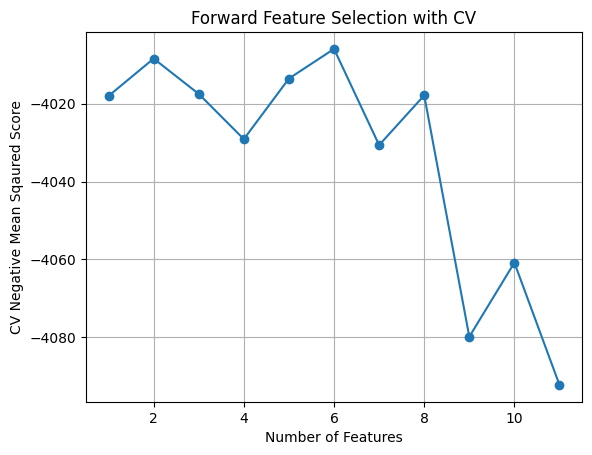

In [117]:
# Plot
plt.plot(results_forward['num_features'], results_forward['avg_score'], marker='o')
plt.xlabel('Number of Features')
plt.ylabel('CV Negative Mean Sqaured Score')
plt.title('Forward Feature Selection with CV')
plt.grid(True)
plt.show()

<h2 style='font-weight:bold; color:red;'> Student Perf </h2>

In [23]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 

# no missing values in the dataset
student_perf = pd.concat([X, y], axis=1)

student_perf.dtypes.value_counts()

object    17
int64     16
Name: count, dtype: int64